##   PROJECT 2: FRAUDULENT CREDIT CARDS TRANSACTIONS  <p align="center"> </p>


## Context
A bank is interested in providing higher quality customer service to protect customers financial
assets. The bank has been receiving several complaints about credit card frauds from their
customers and the news media is regularly reporting about how the bank's customers are losing
large amounts of money and the bank is doing nothing to stop it. This is impacting both the
customers experience and their market share. The Senior Management is asking for a deep dive
into this issue.
You just got hired as the Business Analyst for the bank, and they provided you with 6 months of
available data (step 0 to 179 refer to the dates). They want you to share some insights using the
features in the file to determine if you can see a pattern for the fraudulent transactions. They are
expecting you to provide some suggestions on how to tackle the problem.


## Questions
1. Show a summary of the variable you are studying (target variable). Plot the most
appropriate graph to represent this data
2. Calculate summary statistics from the data
3. Calculation of daily trends of transactions for different categories of variables
4. What are your thoughts on the fraudulent transactions? Is there a threshold of the
spent? Is there a specific ‘gender’ with a higher probability to be the victim of a
fraudulent act? or ‘category’ of transactions with higher chance to be fraudulent?
5. What are your recommendations to the bank's management and describe how
your solution will help regain trust from customers?
6. Any other data that you would ask the team to provide? Why?

## I- Data Wrangling

In [1]:
print('hello')

hello


In [8]:
# Importing our librairies
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy import stats
import datetime as dt 
sns.set()

In [4]:
# Loading our dataset 
customer_data = pd.read_csv('bs140513_032310.csv')
customer_data1 = pd.read_csv('bsNET140513_032310.csv')

In [90]:
customer_data.head()



,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


In [6]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   customer     594643 non-null  object 
 2   age          594643 non-null  object 
 3   gender       594643 non-null  object 
 4   zipcodeOri   594643 non-null  object 
 5   merchant     594643 non-null  object 
 6   zipMerchant  594643 non-null  object 
 7   category     594643 non-null  object 
 8   amount       594643 non-null  float64
 9   fraud        594643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 45.4+ MB


In [88]:
customer_data['fraud'].value_counts().to_frame()

,fraud
0,587443
1,7200


In [84]:
x = customer_data.pivot_table(values = 'age', index = 'fraud', columns= 'gender', aggfunc = 'count')
x['total'] = x.sum(axis= 1)
x["'U'"] = x["'U'"].fillna(0)
x

gender,'E','F','M','U',total
fraud,,,,,
0,1171.0,319807.0,265950.0,515.0,587443.0
1,7.0,4758.0,2435.0,0.0,7200.0


<AxesSubplot:xlabel='step'>

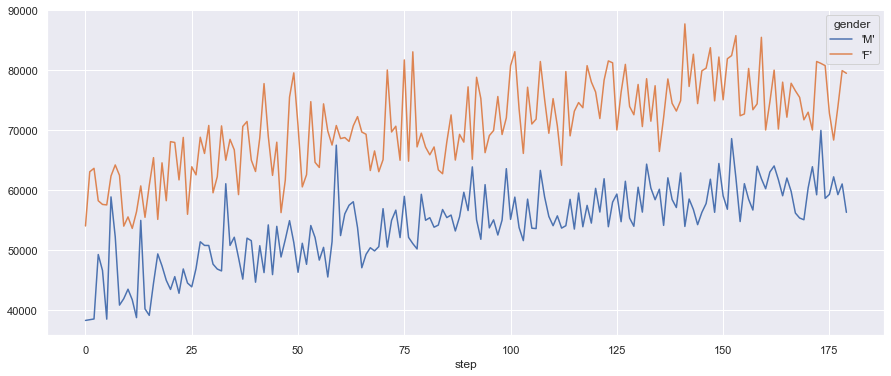

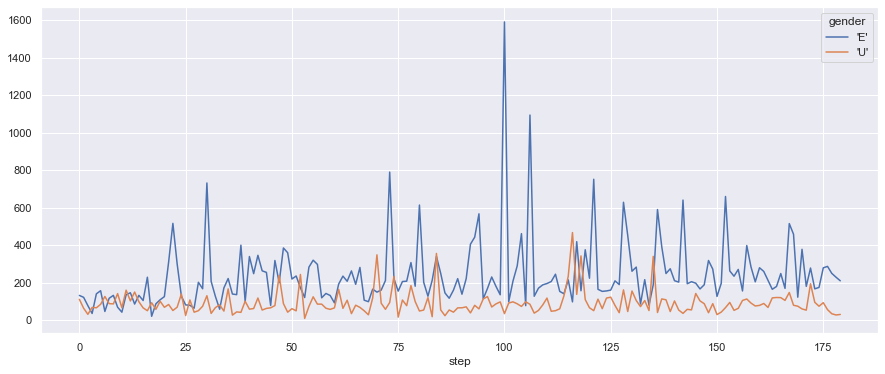

In [89]:
result = customer_data.pivot_table(values = 'amount', index = 'step', columns = 'gender', aggfunc= 'sum')
result.head()
result1 = result.loc[:,["'M'","'F'"]] 
result2  = result.loc[:,["'E'","'U'"]]
result1.plot( figsize = (15,6))
result2.plot(figsize = (15,6))